 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 03 : Statistical Classification</b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Linear Classification </b> <br>
In this programming assignment, you will get a chance to implement different linear classification models. You will start off with simple algorithms like Least Squares classification, LDA and FDA. Further you will be implementing perceptron algorithm. Finally you will be implementing probabilistic approaches for classification. To get further insights into these classification methods you will be drawing few critical comparisions between their performance and application scenario.




**Part-1) Least squares for classification**

1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2,2), both with variance 0.3. Further, generate a test set [X_test, Y_test] from the same distribution, starting with 200 samples per class.
2. Write a function LS_Classify to generate predictions Y_pred for the 2-class data generated.
3. Evaluate the classification performance (prediction error) by comparing the predicted labels Y_pred to the true labels Y_test.
4. Visualize the obtained results, write a function to generate & visualize the decision boundary between the classes, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
import random
import math


percent accuracy 89.0


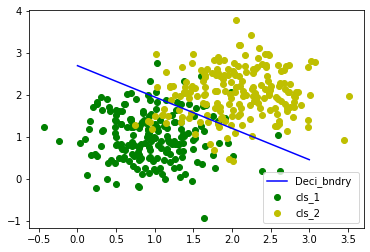

In [ ]:

########################################
#Part-2)-1: Data generation
########################################
mean1=[1,1]
mean2=[2,2]
cov=[[0.3,0],[0,0.3]]
def samplepts(mean,covar,n):
  x,y=np.random.multivariate_normal(mean,covar,n).T
  return x,y
####################Traning data
ntr=50
x1tr,y1tr=samplepts(mean1,cov,ntr)
x2tr,y2tr=samplepts(mean2,cov,ntr)

labltr=np.ones((ntr,1),int)  ###label_2=1,###label_1=-1
a1tr=np.column_stack((np.column_stack((x1tr,y1tr)),-labltr))
a2tr=np.column_stack((np.column_stack((x2tr,y2tr)),labltr))
cls_1tr=np.column_stack((labltr,a1tr)) ##augmented clsx data with label
cls_2tr=np.column_stack((labltr,a2tr)) ##augmented clsy data with label
all_trdata=np.vstack((cls_1tr,cls_2tr))
##############Test data
ntst=200
labltst=np.ones((ntst,1),int)
x1tst,y1tst=samplepts(mean1,cov,ntst)
x2tst,y2tst=samplepts(mean2,cov,ntst)
a1tst=np.column_stack((np.column_stack((x1tst,y1tst)),-labltst))
a2tst=np.column_stack((np.column_stack((x2tst,y2tst)),labltst))
cls_1tst=np.column_stack((labltst,a1tst)) ##augmented clsx data with label
cls_2tst=np.column_stack((labltst,a2tst))  ##augmented clsy data with label
all_tstdata=np.vstack((cls_1tst,cls_2tst))
########################################
#Part-2)-2
########################################
def LS_Classify(X_,T):
  p1=np.linalg.inv(np.matmul(X_.T,X_))
  p2=np.matmul(X_.T,T)
  w=np.matmul(p1,p2)
  return w

wts=LS_Classify(all_trdata[:,0:3],all_trdata[:,-1])
y=np.matmul(all_trdata[:,0:3],wts)

##########################################
#Part-2)-3
##########################################
def LS_Classify_Accuracy(wt,tstdata):
  t_p=np.zeros((len(tstdata),1),int)
  yp=np.matmul(wt.T,tstdata[:,0:3].T)
  for i in range(len(yp)):
    if (yp[i]<0):
      t_p[i]=-1
    elif (yp[i]>0):
      t_p[i]=1

  #print(t_p)
  er_count=np.sum(t_p.T!=tstdata[:,-1])
  #print(er_count)
  acc=(len(tstdata)-er_count)/len(tstdata)
  return acc,t_p
accuracy,t=LS_Classify_Accuracy(wts,all_tstdata)
print('percent accuracy',accuracy*100)
##########################################
#Part-2)-4: Plot the classification results along with decision boundary
##########################################
#plt.plot(y,c='b',label='estim_line ')
# Plot the resulting regression line
x = np.linspace(0,3,100)
y = -wts[0] / wts[2] - (wts[1] / wts[2]) * x

plt.plot(x,y,c='b',label='Deci_bndry ')
plt.scatter(x1tst,y1tst,c='g',label='cls_1')
plt.scatter(x2tst,y2tst,c='y',label='cls_2')
plt.legend()
plt.show()




<b> Part - (2) : Understanding Linear & Fisher Discriminant analysis </b>

Part - (2) (a) : In this part of the programming assignment, you will learn how to code linear discriminant projections and Fisher discriminant projections.

1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2, 2), both with variance 0.3.
2. Write a function to perform projection from 2-D space to 1-D using Linear discriminant analysis. Please note that it considers only between-class covariance in to account
3. Project above generated 2-D synthetic data into 1-D and perform classification. Plot both original and projected data points in the same plot.
4. Write a function to perform projection from 2-D space to 1-D using Fisher discriminant analysis. Please note that it considers both between-class convariance and within-class covariance into account
5. Project above generated 2-D synthetic data into 1-D and perform classification. Plot both original and projected data points in the same plot.
6. Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

Accuracy of LDA:  0.5


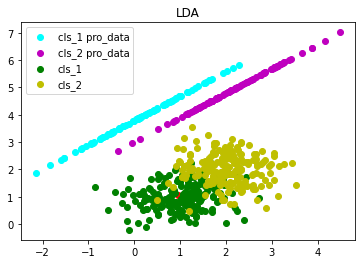

0.9550644762023507 1.0574841874845213
Accuracy of FDA:  1.0


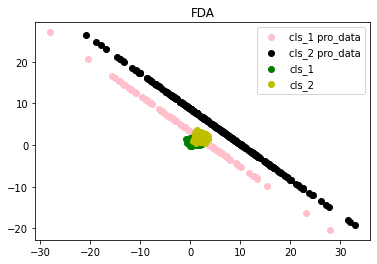

In [ ]:
#Part-(2) (a)

########################################
#Part-2)-(a) 1: Data generation
########################################

mean1=[1,1]
mean2=[2,2]
cov=[[0.3,0],[0,0.3]]
def samplepts(mean,covar,n):
  x,y=np.random.multivariate_normal(mean,covar,n).T
  return x,y
####################Traning data
ntr=50
x1tr,y1tr=samplepts(mean1,cov,ntr)
x2tr,y2tr=samplepts(mean2,cov,ntr)

labltr=np.ones((ntr,1),int) ###label_1=-1 ###label_2=1
a1tr=np.column_stack((np.column_stack((x1tr,y1tr)),-labltr))
a2tr=np.column_stack((np.column_stack((x2tr,y2tr)),labltr))
cls_1tr=np.column_stack((labltr,a1tr)) ##augmented clsx data with label
cls_2tr=np.column_stack((labltr,a2tr)) ##augmented clsy data with label
all_trdata=np.vstack((cls_1tr,cls_2tr)) ##augmented clsy data with label
##############Test data
ntst=200
labltst=np.ones((ntst,1),int)
x1tst,y1tst=samplepts(mean1,cov,ntst)
x2tst,y2tst=samplepts(mean2,cov,ntst)
a1tst=np.column_stack((np.column_stack((x1tst,y1tst)),-labltst))
a2tst=np.column_stack((np.column_stack((x2tst,y2tst)),labltst))
cls_1tst=np.column_stack((labltst,a1tst)) ##augmented clsx data with label
cls_2tst=np.column_stack((labltst,a2tst))  ##augmented clsy data with label
all_tstdata=np.vstack((cls_1tst,cls_2tst))

########################################
#Part-2)-(a) 2:
########################################
def LDA_project(cl1,cl2):
  #print(cl1.shape,cl2.shape)
  m11=np.mean(cl1[:,0])
  m12=np.mean(cl1[:,1])
  m21=np.mean(cl2[:,0])
  m22=np.mean(cl2[:,1])
  b=10
  w1=np.vstack((m11,m12+b))
  w2=np.vstack((m21,m22+b))
  w=w2-w1
  #print(w)
  plt.scatter(m11,m12,c='r')
  plt.scatter(m21,m22,c='b')
  return w
wt_lda=LDA_project(cls_1tr[:,1:3],cls_2tr[:,1:3])


########################################
#Part-2)-(a) 3
########################################

def LDA_classify(w_lda,tst_dt):
  ylda_pro=((w_lda.T@tst_dt.T).T)@(w_lda.T)
  y_ht=np.zeros((len(ylda_pro),1),int)
  m_x=np.mean(ylda_pro[:,0])
  m_y=np.mean(ylda_pro[:,1])
  #print(m_x,m_y)
  w0=np.column_stack((m_x,m_y))
  #print(w0.shape)
  for i in range(len(ylda_pro)):
    if np.all(ylda_pro[i,:]>=-w0):
      y_ht[i]=-1
    elif np.all(ylda_pro[i,:]<-w0):
      y_ht[i]=1
  return y_ht,ylda_pro

y_pre,y_pro=LDA_classify(wt_lda,all_tstdata[:,1:3])
accu_LDA=np.sum(y_pre.T!=all_tstdata[:,-1])/len(all_tstdata)
print("Accuracy of LDA: ",accu_LDA)


#Plot
#plt.plot(x,y,c='b',label='Deci_bndry ')
plt.title('LDA')
plt.scatter(y_pro[0:100,0]-2,y_pro[0:100,1]+2,c='cyan',label='cls_1 pro_data')
plt.scatter(y_pro[100:200,0],y_pro[100:200,1]+3,c='m',label='cls_2 pro_data')
plt.scatter(x1tst,y1tst,c='g',label='cls_1')
plt.scatter(x2tst,y2tst,c='y',label='cls_2')
plt.legend()
plt.show()
######3since the data is large and not linearly seperable i.e overlapping, the projected datas of cl1 and cl2 has been added with biased for better visualisation

########################################
#Part-2)-(a) 4
########################################
mx1=np.mean(cls_1tr[:,1])
my1=np.mean(cls_1tr[:,2])
print(mx1,my1)
m1=np.vstack((mx1,my1))
mx2=np.mean(cls_2tr[:,1])
my2=np.mean(cls_2tr[:,2])
m2=np.vstack((mx2,my2))
c13=np.zeros((2,2),float)
c23=np.zeros((2,2),float)

for i in range((ntr)):
  c11=(cls_1tr[i,1:3].T-m1)
  c12=c11@c11.T
  c13=c13+c12
  #print(c13)
  c21=(cls_2tr[i,1:3].T-m2)
  c22=c21@c21.T
  c23=c23+c22
  #print(c23)
sw=c13+c23

sw_inv=np.linalg.inv(sw)
#print('sw i',sw_inv)
wt_fda=sw_inv@(m1-m2)
#print(wt_fda)
def FDA_project(xx,wt_fda):
  y_fda=((wt_fda.T@xx.T).T)@(wt_fda.T)
  return y_fda
yfda_pro=FDA_project(all_tstdata[:,1:3],wt_fda)

########################################
#Part-2)-(a) 5
########################################
def FDA_classify(ypro_data):
  y_ht=np.zeros((len(ypro_data),1),int)
  m_x=np.mean(ypro_data[:,0])
  m_y=np.mean(ypro_data[:,1])
  #print(m_x,m_y)
  w0=np.column_stack((m_x,m_y))
  #print(w0.shape)
  for i in range(len(ypro_data)):
    if np.all(ypro_data[i,:]>-w0):
      y_ht[i]=-1
    elif np.all(ypro_data[i,:]<-w0):
      y_ht[i]=1
  return y_ht

yf_pre=FDA_classify(yfda_pro)
accu_FDA=np.sum(yf_pre.T!=all_tstdata[:,-1])/len(all_tstdata)
print("Accuracy of FDA: ",accu_FDA)


#Plot
plt.title('FDA')
plt.scatter(yfda_pro[0:100,0]*1000-2,yfda_pro[0:100,1]*1000+5,c='pink',label='cls_1 pro_data')
plt.scatter(yfda_pro[100:,0]*1000+2,yfda_pro[100:,1]*1000+7,c='black',label='cls_2 pro_data')
plt.scatter(x1tst,y1tst,c='g',label='cls_1')
plt.scatter(x2tst,y2tst,c='y',label='cls_2')
plt.legend()
plt.show()


########################################
#Part-2)-(a) 6
########################################
sb=(m2-m1)@(m2-m1).T

#def FDA_project_K(x):











<b> Part (3) : Implimenting Perceptron Algorithm </b>
1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2,2), both with variance 0.3.
2. Implement perceptron algorithm and classify the above generated synthetic data using perceptron algorithm and plot the decision boundary/regions.
3. Add true outliers to one of the classes in the above generated synthetic data and perform classification using perceptron algorithm. Plot the decision boundary/regions. Compare and contrast the decision boundaries learned using least squares and perceptron approach.
4. Use Gaussian distribution with appropriate parameters and produce a dataset with four classes and 30 samples per class: the classes must live in the 2D space and be centered on the corners of the unit square (0,0), (0,1) (1,1), (1,0), all with variance 0.3. Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the same class with labels +1 and -1. representing XOR problem and classify it using the perceptron algorithm.
5. Report your observations


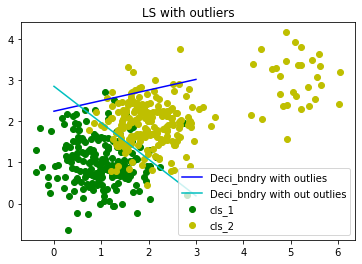

In [ ]:
########################################
#Part-3)-1: Data generation
########################################
meana_1=[1,1]
meana_2=[2,2]
cov1=[[0.3,0],[0,0.3]]
def samplepts(mean,covar,n):
  x,y=np.random.multivariate_normal(mean,covar,n).T
  return x,y
####################Traning data
ntr=50
x1tr1,y1tr1=samplepts(meana_1,cov1,ntr)
x2tr1,y2tr1=samplepts(meana_2,cov1,ntr)

labltr1=np.ones((ntr,1),int) ###label_1=-1 ###label_2=1
a1tr1=np.column_stack((np.column_stack((x1tr1,y1tr1)),-labltr1))
a2tr1=np.column_stack((np.column_stack((x2tr1,y2tr1)),labltr1))
cls_1tr1=np.column_stack((labltr1,a1tr1)) ##augmented clsx data with label
cls_2tr1=np.column_stack((labltr1,a2tr1)) ##augmented clsy data with label
all_trdata1=np.vstack((cls_1tr1,cls_2tr1)) ##augmented clsy data with label
##############Test data
ntst1=200
labltst1=np.ones((ntst,1),int)
x1tst1,y1tst1=samplepts(meana_1,cov1,ntst1)
x2tst1,y2tst1=samplepts(meana_2,cov1,ntst1)
a1tst1=np.column_stack((np.column_stack((x1tst1,y1tst1)),-labltst1))
a2tst1=np.column_stack((np.column_stack((x2tst1,y2tst1)),labltst1))
cls_1tst1=np.column_stack((labltst1,a1tst1)) ##augmented clsx data with label
cls_2tst1=np.column_stack((labltst1,a2tst1))  ##augmented clsy data with label
all_tstdata1=np.vstack((cls_1tst1,cls_2tst1))

########################################
#Part-3)-2
########################################

# def Perceptron(x_train,x_test):
#   w=np.zeros((1000,2))
#   w[0,:]=[0,0]
#   j=1
#   f=w[0,:]@(x_train[:,1:3].T)
#   for i in range(len(x_train)):
#     e




#   return 0






##########################################
#Part-3)-3: With outliers. Compare with Least Squares
##########################################
mean3=[5,3]
ntst2=30
labltst=np.ones((ntst2,1),int)
ox2tst,oy2tst=samplepts(mean3,cov1,ntst2)
oa1tst=np.column_stack((np.column_stack((ox2tst,oy2tst)),labltst))
oa2tst=np.column_stack((labltst,oa1tst))
o_all_tstdata=np.vstack((all_tstdata,oa2tst))
#o_all_tstdata=np.vstack((all_tstdata,oa2tst))
cl2x=np.concatenate((x2tst1,ox2tst))
cl2y=np.concatenate((y2tst1,oy2tst))
def LS_Classify(X_,T):
  p1=np.linalg.inv(np.matmul(X_.T,X_))
  p2=np.matmul(X_.T,T)
  w=np.matmul(p1,p2)
  return w
###with outliers
wtso=LS_Classify(o_all_tstdata[:,0:3],o_all_tstdata[:,-1])
yo=np.matmul(o_all_tstdata[:,0:3],wtso)
wtwo=LS_Classify(all_trdata[:,0:3],all_trdata[:,-1])
ywo=np.matmul(o_all_tstdata[:,0:3],wtwo)
# Plot the resulting regression line
xo = np.linspace(0,3,100)
you = -wtso[0] / wtso[2] - (wtso[1] / wtso[2]) * xo
ywou=-wtwo[0] / wtwo[2] - (wtwo[1] / wtwo[2]) * xo
plt.title('LS with outliers')
plt.plot(xo,you,c='b',label='Deci_bndry with outlies')
plt.plot(xo,ywou,c='c',label='Deci_bndry with out outlies')
plt.scatter(x1tst1,y1tst1,c='g',label='cls_1')
plt.scatter(cl2x,cl2y,c='y',label='cls_2')
plt.legend()
plt.show()


##########################################
#Part-3)-4: Data generation XOR
##########################################












##########################################
#Part-3)-5: Observations
##########################################







<b> Part-4) Logistic Regression </b>

1. Use Gaussian distribution with appropriate parameters and produce a dataset with 2 classes and 50 samples per class: the classes must live in the 2D space and be centered at (1,1) (2,2), both with variance 0.3. Further, generate a test set [X_test, Y_test] from the same distribution, starting with 200 samples per class.
2. Write a function Logistic_Regression to generate predictions Y_pred for the 2-class data generated.
3. Evaluate the classification performance (prediction error) by comparing the predicted labels Y_pred to the true labels Y_test.
4. Write a function to generate & visualize the decision boundary between the classes, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.
5. Add true outliers to one of the classes to the data generated in the above generated data and perform the Least Squares classification and Logistic Regression for this data, plot the decision boundary/regions and write your observations on the difference between them.

In [ ]:
##################################################
#Part-4)-1: Data generation
##################################################
mean1=[1,1]
mean2=[2,2]
cov=[[0.3,0],[0,0.3]]
def samplepts(mean,covar,n):
  x,y=np.random.multivariate_normal(mean,covar,n).T
  return x,yDrive

####################Traning data
ntr=50
x1tr,y1tr=samplepts(mean1,cov,ntr)
x2tr,y2tr=samplepts(mean2,cov,ntr)
labl_1=np.zeros((ntr,1),int) ###label_1=0
labl_2=np.ones((ntr,1),int)  ###label_2=1
a1tr=np.column_stack(np.column_stack((x1tr,y1tr)),labl_1)
a2tr=np.column_stack(np.column_stack((x2tr,y2tr)),labl_2)

#####################Test data
ntst=200
x1tst,y1tst=samplepts(mean1,cov,ntst)
x2tst,y2tst=samplepts(mean2,cov,ntst)
lbl_1=np.zeros((ntst,1),int) ###label_1=0
lbl_2=np.ones((ntst,1),int)  ###label_2=1
a1tst=np.column_stack(np.column_stack((x1tst,y1tst)),lbl_1)
a2tst=np.column_stack(np.column_stack((x2tst,y2tst)),lbl_2)

##################################################
#Part-4)-2:
##################################################
def Logistic_Regression(X_train, Y_train, X_test):
  max_iter = 100 #max number of ierations for parameter update
  threshold = 0.5 #threshold for classification







###############################################
#Part-4)-3:
###############################################
def LR_Accuracy(Y_test, Y_pred):









##########################################
#Part-4)-4: Plot the classification results along with decision boundary
##########################################









##########################################
#Part-4)-5: Logistic regression for the data with true outliers
##########################################











<b> Part (5) : Understanding decision boundaries of MAP approach to classification </b>

Decision boundary in 2 class classification problem is the locus of points satisfying

<center> $p(c_{1}/x)$ = $p(c_{2}/x)$ </center>

Where $c_{1}$ and $c_{2}$ are the class indicators  and x is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

1. Use Gaussian distribution with appropriate parameters to generate a 2 class synthetic data.

Let us fix the class centers at (1,1) and (3,1). You can chose appropriate variance parameter to get better sepearable data. You are free to change class centers and variance of classes for better visualization.

>  Generate 100 samples from each class amounting to a total of 200 samples. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$

>  Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$

>  Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$

2. Please plots the decision boundaries for all the three cases in three different subplots.

3. Report your observations

**Optional**
1. Plot the decision boundaries when the covariance matrix of $p(x/c_{1})$ i.e $\Sigma_{1}$ and $p(x/c_{2})$ i.e $\Sigma_{2}$ are different.



In [ ]:
##########################################
#Part-5)-1: Data Generation
##########################################
######case1

mean15=[1,1]
mean25=[3,1]
cov5=[[0.03,0],[0,0.03]]
def samplepts(mean,covar,n):
  x,y=np.random.multivariate_normal(mean,covar,n).T
  return x,y
####################Traning data
ntr15=100
x15tr,y15tr=samplepts(mean15,cov5,ntr15)
x25tr,y25tr=samplepts(mean25,cov5,ntr15)

labltr5=np.ones((ntr15,1),int) ###label_1=-1 ###label_2=1
a15tr=np.column_stack((np.column_stack((x15tr,y15tr)),-labltr5))
a25tr=np.column_stack((np.column_stack((x25tr,y25tr)),labltr5))
cls_15tr=np.column_stack((labltr5,a15tr)) ##augmented clsx data with label
cls_25tr=np.column_stack((labltr5,a25tr)) ##augmented clsy data with label
all_trdata5=np.vstack((cls_15tr,cls_25tr)) ##augmented clsy data with label

p_c11=100/200  ##p[c1]
p_c12=100/200  ##p[c2]
u11_x1=np.mean(x15tr)
u11_y1=np.mean(y15tr)
u21_x2=np.mean(x25tr)
u21_y2=np.mean(y25tr)









##########################################
#Part-5)-2: Classification and decision boundary plots
##########################################













##########################################
#Part-5)-3: Observations
##########################################










